# Generar mapa distribución lluvia registrada en cuenca nivel 2

## Importar librerias

In [1]:
import pandas as pd
import numpy as np; np.random.seed(0)
import matplotlib.pylab as plt
import seaborn as sns
import requests
import json
import locale
locale.setlocale(locale.LC_TIME, "es_ES")

import matplotlib.font_manager as fm

from IPython.display import HTML

In [10]:
"""
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if "Calibri" in font:
        print(font)

# Ruta completa al archivo .ttf de la fuente Sora (ajústala según tu sistema)
font_path = font

# Cargar la fuente
prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()
"""

'\nfor font in fm.findSystemFonts(fontpaths=None, fontext=\'ttf\'):\n    if "Calibri" in font:\n        print(font)\n\n# Ruta completa al archivo .ttf de la fuente Sora (ajústala según tu sistema)\nfont_path = font\n\n# Cargar la fuente\nprop = fm.FontProperties(fname=font_path)\nplt.rcParams[\'font.family\'] = prop.get_name()\n'

## Acceder a los datos de precipitación procesadas en Delft-FEWS para Cuencas Hidrográficas Nivel 2

**Importante** Se recomienda estar conectado a la VPN de Presidencia para acceder a travez de Servicio web 

In [2]:
# URL de acceso al servicio web de producción de FEWS-Uruguay
# url_base = 'http://testterh-fssaws:8080/FewsWebServices/rest/fewspiservice/v1/timeseries?'
url_base = 'http://prodterh-fssaws:8080/FewsWebServices/rest/fewspiservice/v1/timeseries?'
headers = {'Accept':'application/json'}
# Parametros de busqueda para MAP en cuenca nivel 2
documentVersion='1.24'
documentFormat='PI_JSON'
filterid = 'CuencaNivel2'
parameterIds = 'P.cuenca'
moduleInstanceIds = 'PreprocessP'
# Fecha de inicio de busqueda y finalización. Importante brindar la fecha en UTC
startTime = '2025-12-02T10:00:00Z'
endTime = '2026-01-01T10:00:00Z'
# URL de busqueda de datos de MAP 
url = f"{url_base}filterId={filterid}&parameterIds={parameterIds}&moduleInstanceIds={moduleInstanceIds}&startTime={startTime}&endTime={endTime}&documentFormat={documentFormat}"

In [3]:
# Abrir consulta con parametros de busqueda
r = requests.get(url,headers=headers)
r.close()
# Debido a que la respuesta es en JSON entonces se convierte a formato JSON
data = json.loads(r.content.decode('utf-8'))

In [69]:
allbasins_n2 = pd.read_csv(f'cuencas_nombres.csv')

In [5]:
# Extrae los datos de MAP para cada cuenca hidrografica
df = pd.DataFrame()
for x in range(len(data['timeSeries'])):
    extraer_estacion = data['timeSeries'][x]['header']['locationId']
    datos_estacion = pd.DataFrame(data['timeSeries'][x]['events'])
    df[extraer_estacion] = datos_estacion['value'].values
# Une los datos de fecha y hora
datos_estacion = datos_estacion.drop(columns=['value','flag'])
datos_estacion = pd.to_datetime(datos_estacion['date'] + ' ' + datos_estacion['time'])
datos_estacion.to_frame()
# Une los datos con las fechas de serie de tiempo
df = pd.concat([datos_estacion, df],axis=1,join='inner')
df = df.rename(columns= {0: 'FECHA'})
# Convierte la hora de UTC a UTC-0300 (hora Montevideo)
df['FECHA'] = df['FECHA'] - pd.Timedelta(hours=3)
df['FECHA'] = df['FECHA'] - pd.Timedelta(days=1)
df.set_index('FECHA')
df.sort_index(ascending=True)
df = df.filter(regex='^(?!6060)')
display(df.tail(31))

,FECHA,11,12,13,14,15,16,17,18,19,...,62,63,64,65,66,67,68,50,10,40
0,2025-12-01 07:00:00,0.5,0.19,1.2,1.86,0.82,0.47,0.56,1.31,0.47,...,0.01,0.25,0,0,0.09,0.32,0.37,0.13,0.39,2.08
1,2025-12-02 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0.02,0,0,0,0.02,0,0,0,0.03
2,2025-12-03 07:00:00,0.2,0,0,0,0,0.03,0.1,0.05,0,...,0,0,0,0,0,0,0,0,0.61,0
3,2025-12-04 07:00:00,0,0,0.12,0,0.23,0,0.07,0,0,...,0,0,0,0,0,0,0,0,0.31,0
4,2025-12-05 07:00:00,0.4,0.57,0.09,0,0,0,0,0,0,...,0,0.14,0,0,0,0,0,0,0.1,0
5,2025-12-06 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2025-12-07 07:00:00,15.38,8.54,2.8,4.63,0.69,0.15,0.09,0,0,...,0,0,0,0,0,0,0,0,12.93,0
7,2025-12-08 07:00:00,31.59,48.22,47.99,25.05,35.52,67.74,40.81,21.55,0.79,...,0.53,0.26,1.24,2.33,0.99,0,0,39.18,55,30.86
8,2025-12-09 07:00:00,18.5,9.94,11.62,7.47,10.99,16.67,31.21,8.52,6.13,...,5.27,0.13,0.2,11.57,0,0,0,42.13,5.65,52.58
9,2025-12-10 07:00:00,0,0.54,0.25,0,0.18,0.01,0.12,0.09,4.65,...,0,0,0,0,0,0,0,4.23,0.15,3.74


## Utilizar si no se tiene en funcionamiento el WS de FEWS

In [6]:
"""
df = pd.read_csv(f'Pmonthly_backup.csv')
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['FECHA'] = df['FECHA'] - pd.Timedelta(days=1)
display(df.tail(6))
"""

"\ndf = pd.read_csv(f'Pmonthly_backup.csv')\ndf['FECHA'] = pd.to_datetime(df['FECHA'])\ndf['FECHA'] = df['FECHA'] - pd.Timedelta(days=1)\ndisplay(df.tail(6))\n"

In [7]:
cols = ['FECHA','63','67','28','52','45','42','40','31','33','32','30','12','13','44','10','15','27','29','24','22','26','20','58','55','54','57','50','43','17','23','65','21','61','64','68','66','62','60','53','51','41','14','11','16','19','18','56']
df = df[cols]

In [8]:
piv = pd.pivot_table(df,columns=["FECHA"])
piv[piv < 0] = np.NaN
display(piv.head(10))

FECHA,2025-12-01 07:00:00,2025-12-02 07:00:00,2025-12-03 07:00:00,2025-12-04 07:00:00,2025-12-05 07:00:00,2025-12-06 07:00:00,2025-12-07 07:00:00,2025-12-08 07:00:00,2025-12-09 07:00:00,2025-12-10 07:00:00,...,2025-12-22 07:00:00,2025-12-23 07:00:00,2025-12-24 07:00:00,2025-12-25 07:00:00,2025-12-26 07:00:00,2025-12-27 07:00:00,2025-12-28 07:00:00,2025-12-29 07:00:00,2025-12-30 07:00:00,2025-12-31 07:00:00
10,0.39,0.0,0.61,0.31,0.10,0.0,12.93,55.00,5.65,0.15,...,0.25,0.29,25.49,5.51,0.46,26.26,24.68,0.06,0.0,0.01
11,0.50,0.0,0.20,0.00,0.40,0.0,15.38,31.59,18.50,0.00,...,0.99,0.00,23.00,0.04,0.28,12.85,14.99,0.00,0.0,0.00
12,0.19,0.0,0.00,0.00,0.57,0.0,8.54,48.22,9.94,0.54,...,1.79,0.99,5.96,6.38,3.92,5.02,12.94,0.00,0.0,0.00
13,1.20,0.0,0.00,0.12,0.09,0.0,2.80,47.99,11.62,0.25,...,7.15,0.32,1.45,2.88,13.32,10.33,7.28,0.00,0.0,0.01
14,1.86,0.0,0.00,0.00,0.00,0.0,4.63,25.05,7.47,0.00,...,0.09,0.00,0.00,0.00,0.00,0.02,6.33,0.00,0.0,0.00
15,0.82,0.0,0.00,0.23,0.00,0.0,0.69,35.52,10.99,0.18,...,0.07,0.00,0.00,1.34,3.17,5.36,7.83,0.00,0.0,0.00
16,0.47,0.0,0.03,0.00,0.00,0.0,0.15,67.74,16.67,0.01,...,0.68,0.00,0.00,0.00,0.00,0.10,1.44,0.00,0.0,0.00
17,0.56,0.0,0.10,0.07,0.00,0.0,0.09,40.81,31.21,0.12,...,1.05,0.02,1.16,1.66,1.46,4.05,4.27,0.03,0.0,0.01
18,1.31,0.0,0.05,0.00,0.00,0.0,0.00,21.55,8.52,0.09,...,0.00,0.00,3.98,0.00,0.00,0.16,3.77,0.00,0.0,0.00
19,0.47,0.0,0.00,0.00,0.00,0.0,0.00,0.79,6.13,4.65,...,0.00,0.00,2.26,0.00,0.04,0.00,1.25,0.00,0.0,0.00


In [9]:
piv2 = piv.transpose()
HTML(piv2.tail(2).to_html())

,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,40,41,42,43,44,45,50,51,52,53,54,55,56,57,58,60,61,62,63,64,65,66,67,68
FECHA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-12-30 07:00:00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.01,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-12-31 07:00:00,0.01,0.0,0.0,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.26,0.63,0.05,1.47,0.95,3.01,0.23,0.02,0.0,0.0,0.0,0.0,0.85,0.06,0.0,0.01,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.11,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# piv2.to_clipboard(excel=True, sep=',', index=False)

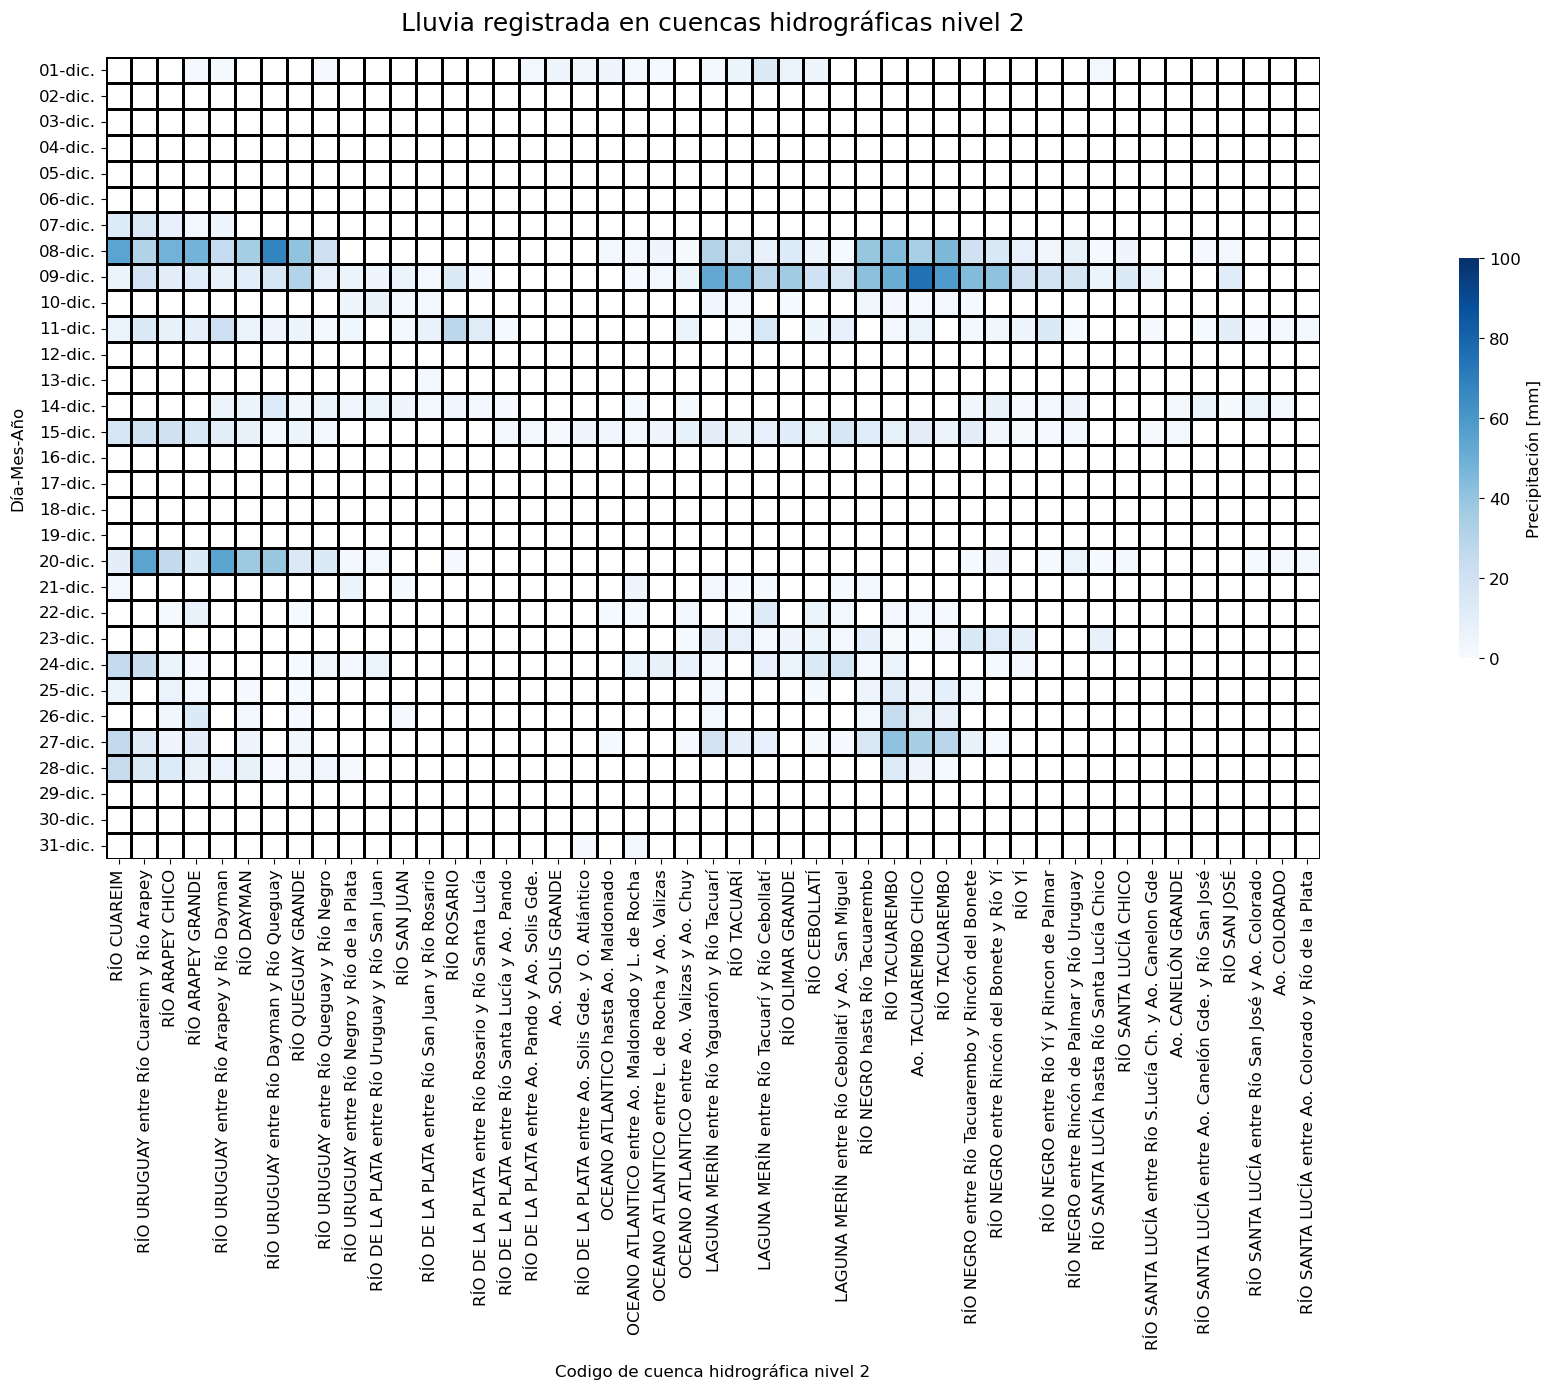

In [10]:
from cProfile import label
from matplotlib.pyplot import axis
from numpy import size, sort
import matplotlib
from matplotlib import pyplot as plt

font_size = 12
fig, ax = plt.subplots(figsize=(28,14))

values = piv2.to_numpy(dtype=float)

myColors = ['#ffffff','#F7FCF0','#E0F3DB','#CCEBC5','#A8DDB5','#7BCCC4','#4EB3D3','#2B8CBE','#0868AC','#084081']
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
cmap = "Blues"
# cmap = "YlGnBu"

# sns.set(font_scale=1) # font size 2 
# ax = sns.heatmap(piv2,square=True,cmap="YlGnBu",vmin=0, vmax=100,annot=True,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": .82,"label":'Precipitación [mm]'},mask=values == 0,ax=ax)
ax = sns.heatmap(piv2,square=True,cmap=cmap,annot=False,vmin=0, vmax=100,linewidths=1.0,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": 0.5,"label":'Precipitación [mm]'},mask=values < 1,ax=ax)

ax.set_title('Lluvia registrada en cuencas hidrográficas nivel 2', pad=20, loc='center',size=18)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

ax.set_ylabel('Día-Mes-Año',rotation=90, labelpad=10,size=font_size)
ax.set_yticklabels(df['FECHA'].dt.strftime('%d-%b'),fontsize=font_size)

ax.set_xlabel('Codigo de cuenca hidrográfica nivel 2', rotation=0, labelpad=10, fontsize=font_size)
ax.tick_params(axis='x', labelsize=font_size)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=font_size)
ax.figure.axes[-1].yaxis.label.set_size(font_size)

ax.set_xticklabels(allbasins_n2.nombre,rotation=90)

# plt.rcParams['font.family'] = prop.get_name()
plt.tight_layout()
# plt.savefig('final.png', dpi=1000, bbox_inches='tight')

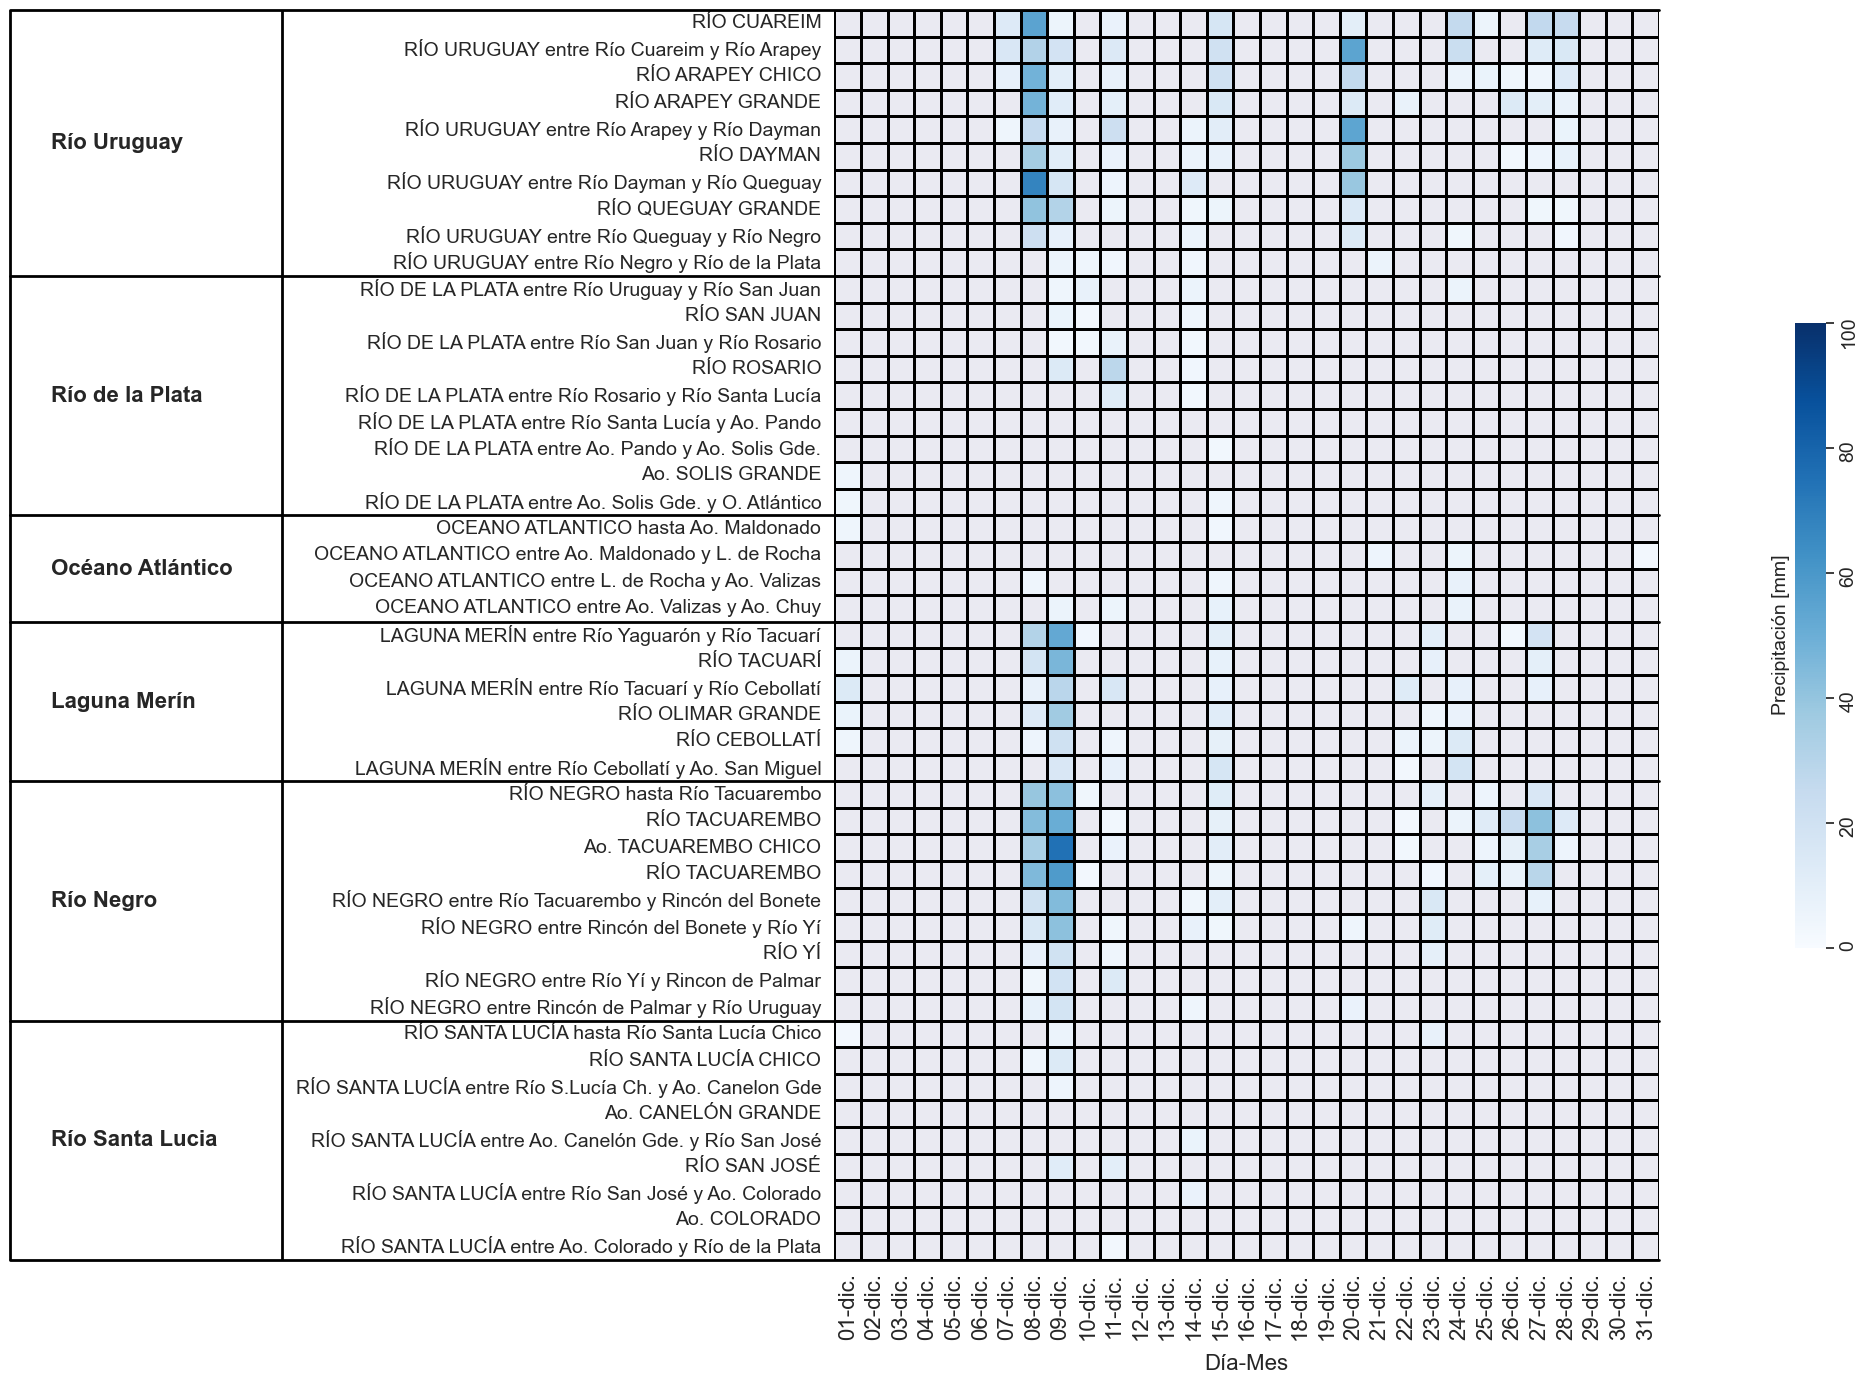

In [73]:
fig, ax = plt.subplots(figsize=(28,14))

values = piv.to_numpy(dtype=float)

myColors = ["#ffffff",'#F7FCF0','#E0F3DB','#CCEBC5','#A8DDB5','#7BCCC4','#4EB3D3','#2B8CBE','#0868AC','#084081']
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

font_size = 14
factor_delta = 2
ancho_linea = 2

# 1. Define the mapping for the groups
group_map = {
    '1': 'Río Uruguay',
    '2': 'Río de la Plata',
    '3': 'Océano Atlántico',
    '4': 'Laguna Merín',
    '5': 'Río Negro',
    '6': 'Río Santa Lucia'
}

# 2. Get the group for each row in the pivot table (assuming piv index is Codigo)
# We take the first character of the basin code string
basin_groups = [group_map.get(str(code)[0], "Otro") for code in piv.index]

# Identify where a new group starts to place labels and lines

change_indices = np.where(np.array(basin_groups)[:-1] != np.array(basin_groups)[1:])[0]

sns.set(font_scale=1) # font size 2 
plt.subplots_adjust(left=0.3) 
# ax = sns.heatmap(piv2,square=True,cmap="YlGnBu",vmin=0, vmax=100,annot=True,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": .82,"label":'Precipitación [mm]'},mask=values == 0,ax=ax)
ax = sns.heatmap(piv,
                 square=True,
                 cmap="Blues",
                 vmin=0, 
                 vmax=100,
                 annot = False,
                 linewidths=1.0,
                 linecolor='black',
                 annot_kws={'fontsize':8},
                 cbar_kws={"shrink": 0.5,"label":'Precipitación [mm]'},
                 mask=values < 3,
                 ax=ax)


# 3. Agregar Etiquetas de Grupo y Bordes Extendidos
last_idx = 0
# Definimos qué tan a la izquierda queremos que empiece el borde (en fracción del eje)
x_lim_left = -1.0

for idx in list(change_indices) + [len(basin_groups) - 1]:
    mid_point = (last_idx + idx + 1) / 2
    group_name = basin_groups[last_idx]
    
    # Texto del Grupo (posicionado más a la izquierda que las etiquetas de los ríos)
    ax.annotate(group_name, xy=(x_lim_left + 0.05, mid_point), 
                xycoords=('axes fraction', 'data'),
                ha='left', va='center', fontweight='bold', fontsize=16)
    
    # Línea horizontal divisoria que se extiende a la izquierda
    # xmin=-0.6 significa que empieza un 60% del ancho del plot hacia la izquierda
    ax.axhline(y=idx + 1, xmin=x_lim_left, xmax=1.0, 
               color='black', linewidth=ancho_linea, clip_on=False)
    
    # Línea horizontal superior para el primer grupo (opcional para cerrar el cuadro arriba)
    if last_idx == 0:
        ax.axhline(y=0, xmin=x_lim_left, xmax=1.0, 
                   color='black', linewidth=ancho_linea, clip_on=False)
        
    last_idx = idx + 1

# 4. Agregar Línea Vertical en el extremo izquierdo para cerrar el borde
ax.vlines(x=x_lim_left, ymin=0, ymax=len(piv), transform=ax.get_yaxis_transform(),
          color='black', linewidth=ancho_linea, clip_on=False)

# 5. Agregar Línea Vertical divisoria entre Grupo y Subcuenca (opcional)
ax.vlines(x=x_lim_left + 0.33, ymin=0, ymax=len(piv), transform=ax.get_yaxis_transform(),
          color='black', linewidth=ancho_linea, clip_on=False)


# ax.set_title('Lluvia registrada en cuencas hidrográficas nivel 2', pad=20, loc='center',size=18)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

ax.set_xlabel('Día-Mes',rotation=0, labelpad=10,size=font_size+2)
ax.set_xticklabels(df['FECHA'].dt.strftime('%d-%b'),fontsize=font_size+2)

# ax.set_ylabel('Codigo de cuenca hidrográfica nivel 2', rotation=90, labelpad=10, fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)

ax.set_yticklabels(allbasins_n2.nombre,rotation=0)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=font_size)
colorbar.ax.yaxis.set_tick_params(rotation=90)
colorbar.ax.yaxis.set_label_position('left')
ax.figure.axes[-1].yaxis.label.set_size(font_size)

# plt.rcParams['font.family'] = prop.get_name()
plt.tight_layout()
# Asegúrate de que el color de fondo sea blanco y no transparente
# plt.savefig('final.png', dpi=300, bbox_inches='tight',facecolor='white',transparent=False)

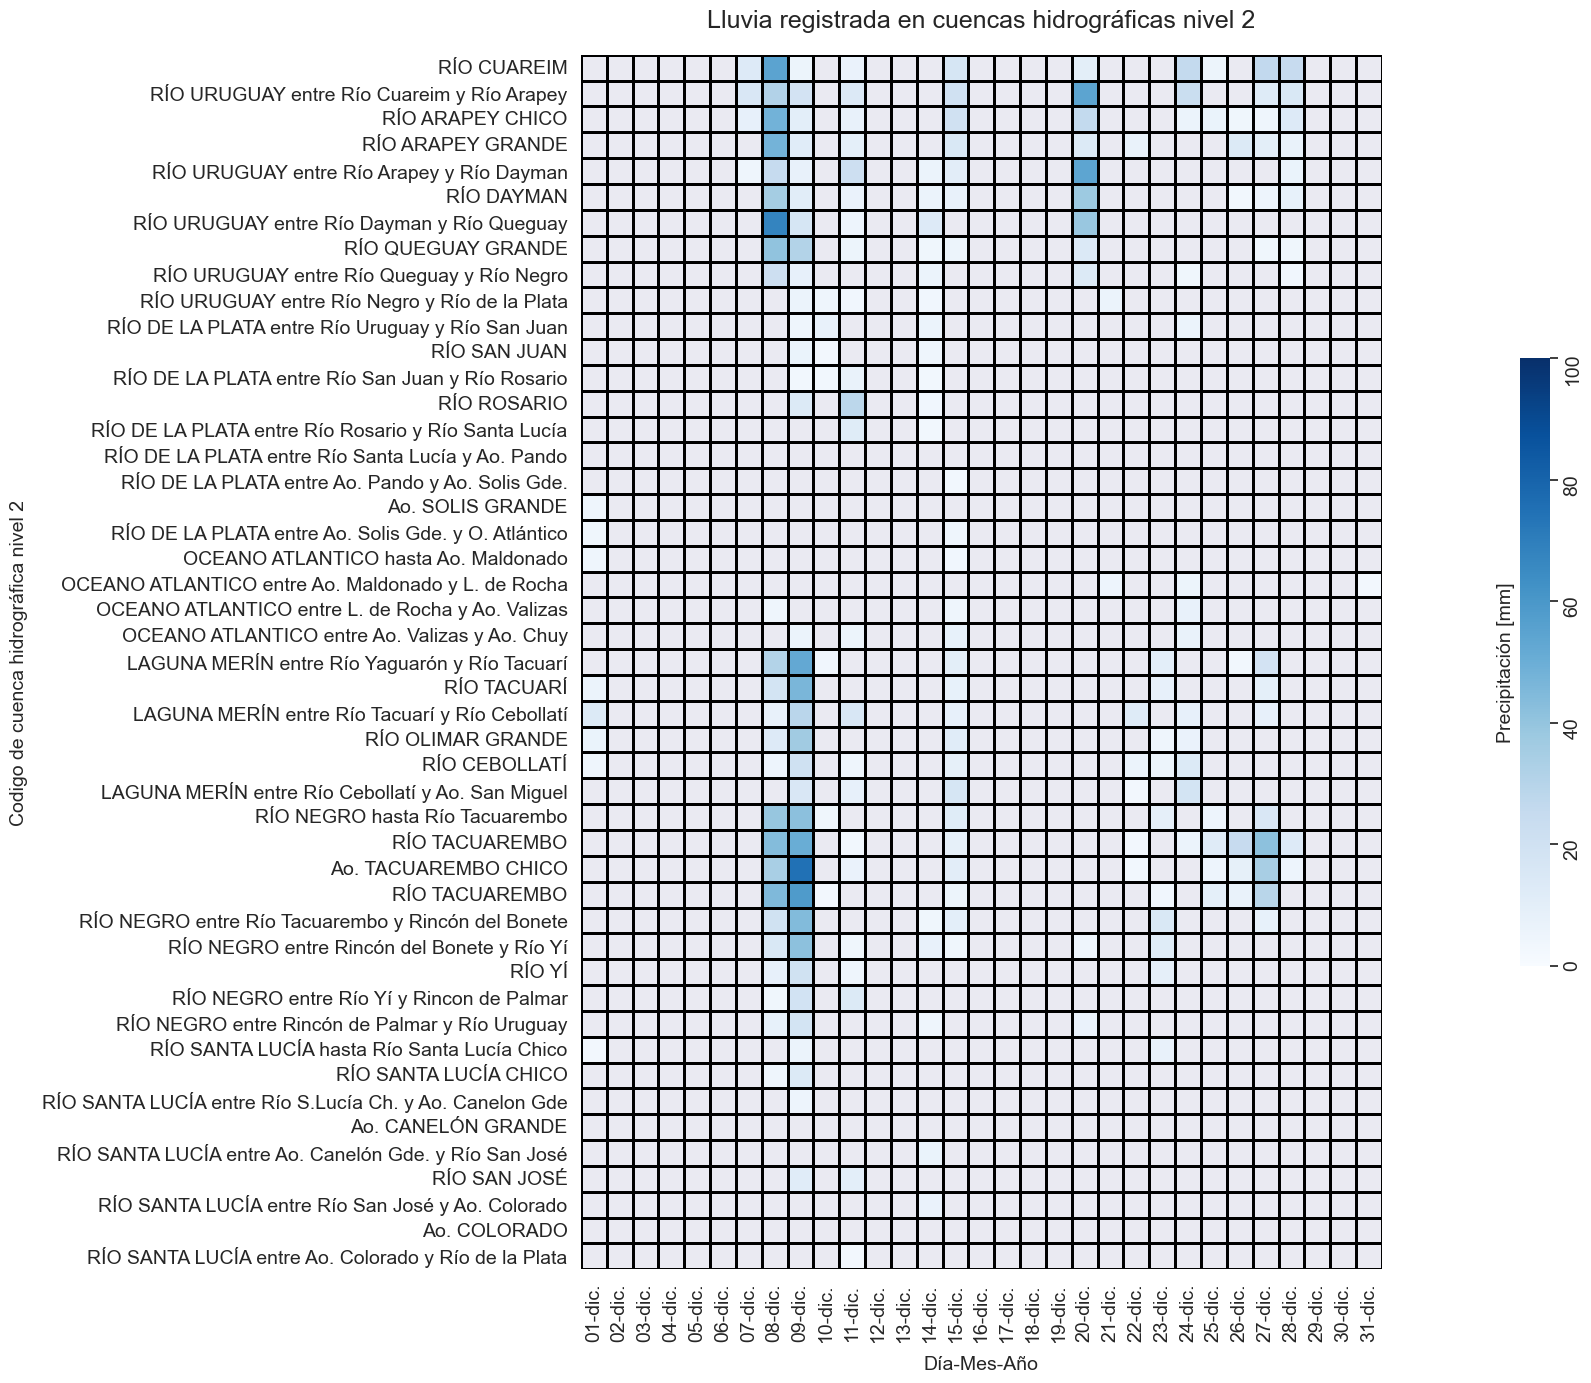

In [45]:
fig, ax = plt.subplots(figsize=(28,14))

values = piv.to_numpy(dtype=float)

myColors = ['#ffffff','#F7FCF0','#E0F3DB','#CCEBC5','#A8DDB5','#7BCCC4','#4EB3D3','#2B8CBE','#0868AC','#084081']
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

font_size = 14

sns.set(font_scale=1) # font size 2 
# ax = sns.heatmap(piv2,square=True,cmap="YlGnBu",vmin=0, vmax=100,annot=True,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": .82,"label":'Precipitación [mm]'},mask=values == 0,ax=ax)
ax = sns.heatmap(piv,
                 square=True,
                 cmap="Blues",
                 vmin=0, 
                 vmax=100,
                 annot = False,
                 linewidths=1.0,
                 linecolor='black',
                 annot_kws={'fontsize':8},
                 cbar_kws={"shrink": 0.5,"label":'Precipitación [mm]'},
                 mask=values < 3,
                 ax=ax)

ax.set_title('Lluvia registrada en cuencas hidrográficas nivel 2', pad=20, loc='center',size=18)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

ax.set_xlabel('Día-Mes-Año',rotation=0, labelpad=10,size=font_size)
ax.set_xticklabels(df['FECHA'].dt.strftime('%d-%b'),fontsize=font_size)

ax.set_ylabel('Codigo de cuenca hidrográfica nivel 2', rotation=90, labelpad=10, fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)

ax.set_yticklabels(allbasins_n2.nombre,rotation=0)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=font_size)
colorbar.ax.yaxis.set_tick_params(rotation=90)
colorbar.ax.yaxis.set_label_position('left')
ax.figure.axes[-1].yaxis.label.set_size(font_size)

# plt.rcParams['font.family'] = prop.get_name()
plt.tight_layout()
# plt.savefig('final.png', dpi=1000, bbox_inches='tight')